In [1]:
# Copyright (c) 2017 Eric Karr
# Software is licensed under the MIT License
# complete license can be found at https://github.com/karreric1/rms/

In [2]:
import numpy as np
import pandas as pd
import decimal
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# file milker_functions.py must be in the same directory as this notebook
from milker_functions import *

### Perform a short-run simulation to show example output

This code simulates a 2-server robotic milking parlor (queue) with exponentially distributed arrivals, normally distributed service times and deterministic downtime.  

In [4]:
# baseline simulation
# two robots running
# lambda = 500, mu = 300, sigma = 100
# duration = 10 days = 864000 seconds
exps = exp_generator(30000, 300)
arrivals = time_totalizer(exps)
services = norm_generator(30000, 300, 100)
breakdowns = 0
initial_queue = 0
servers = 2
duration = 864000
mt = [7200, 7200]  # time bewtween deterministic maintenance
md = 1800  # maintenance duration
(times, total_customers, customers,
 service_durations,
 d1, dt2, oc1,
 oc2, cc) = parallel_plant(arrivals, services, breakdowns,
                           initial_queue, servers, duration,
                           mt, md)

2 Servers Running


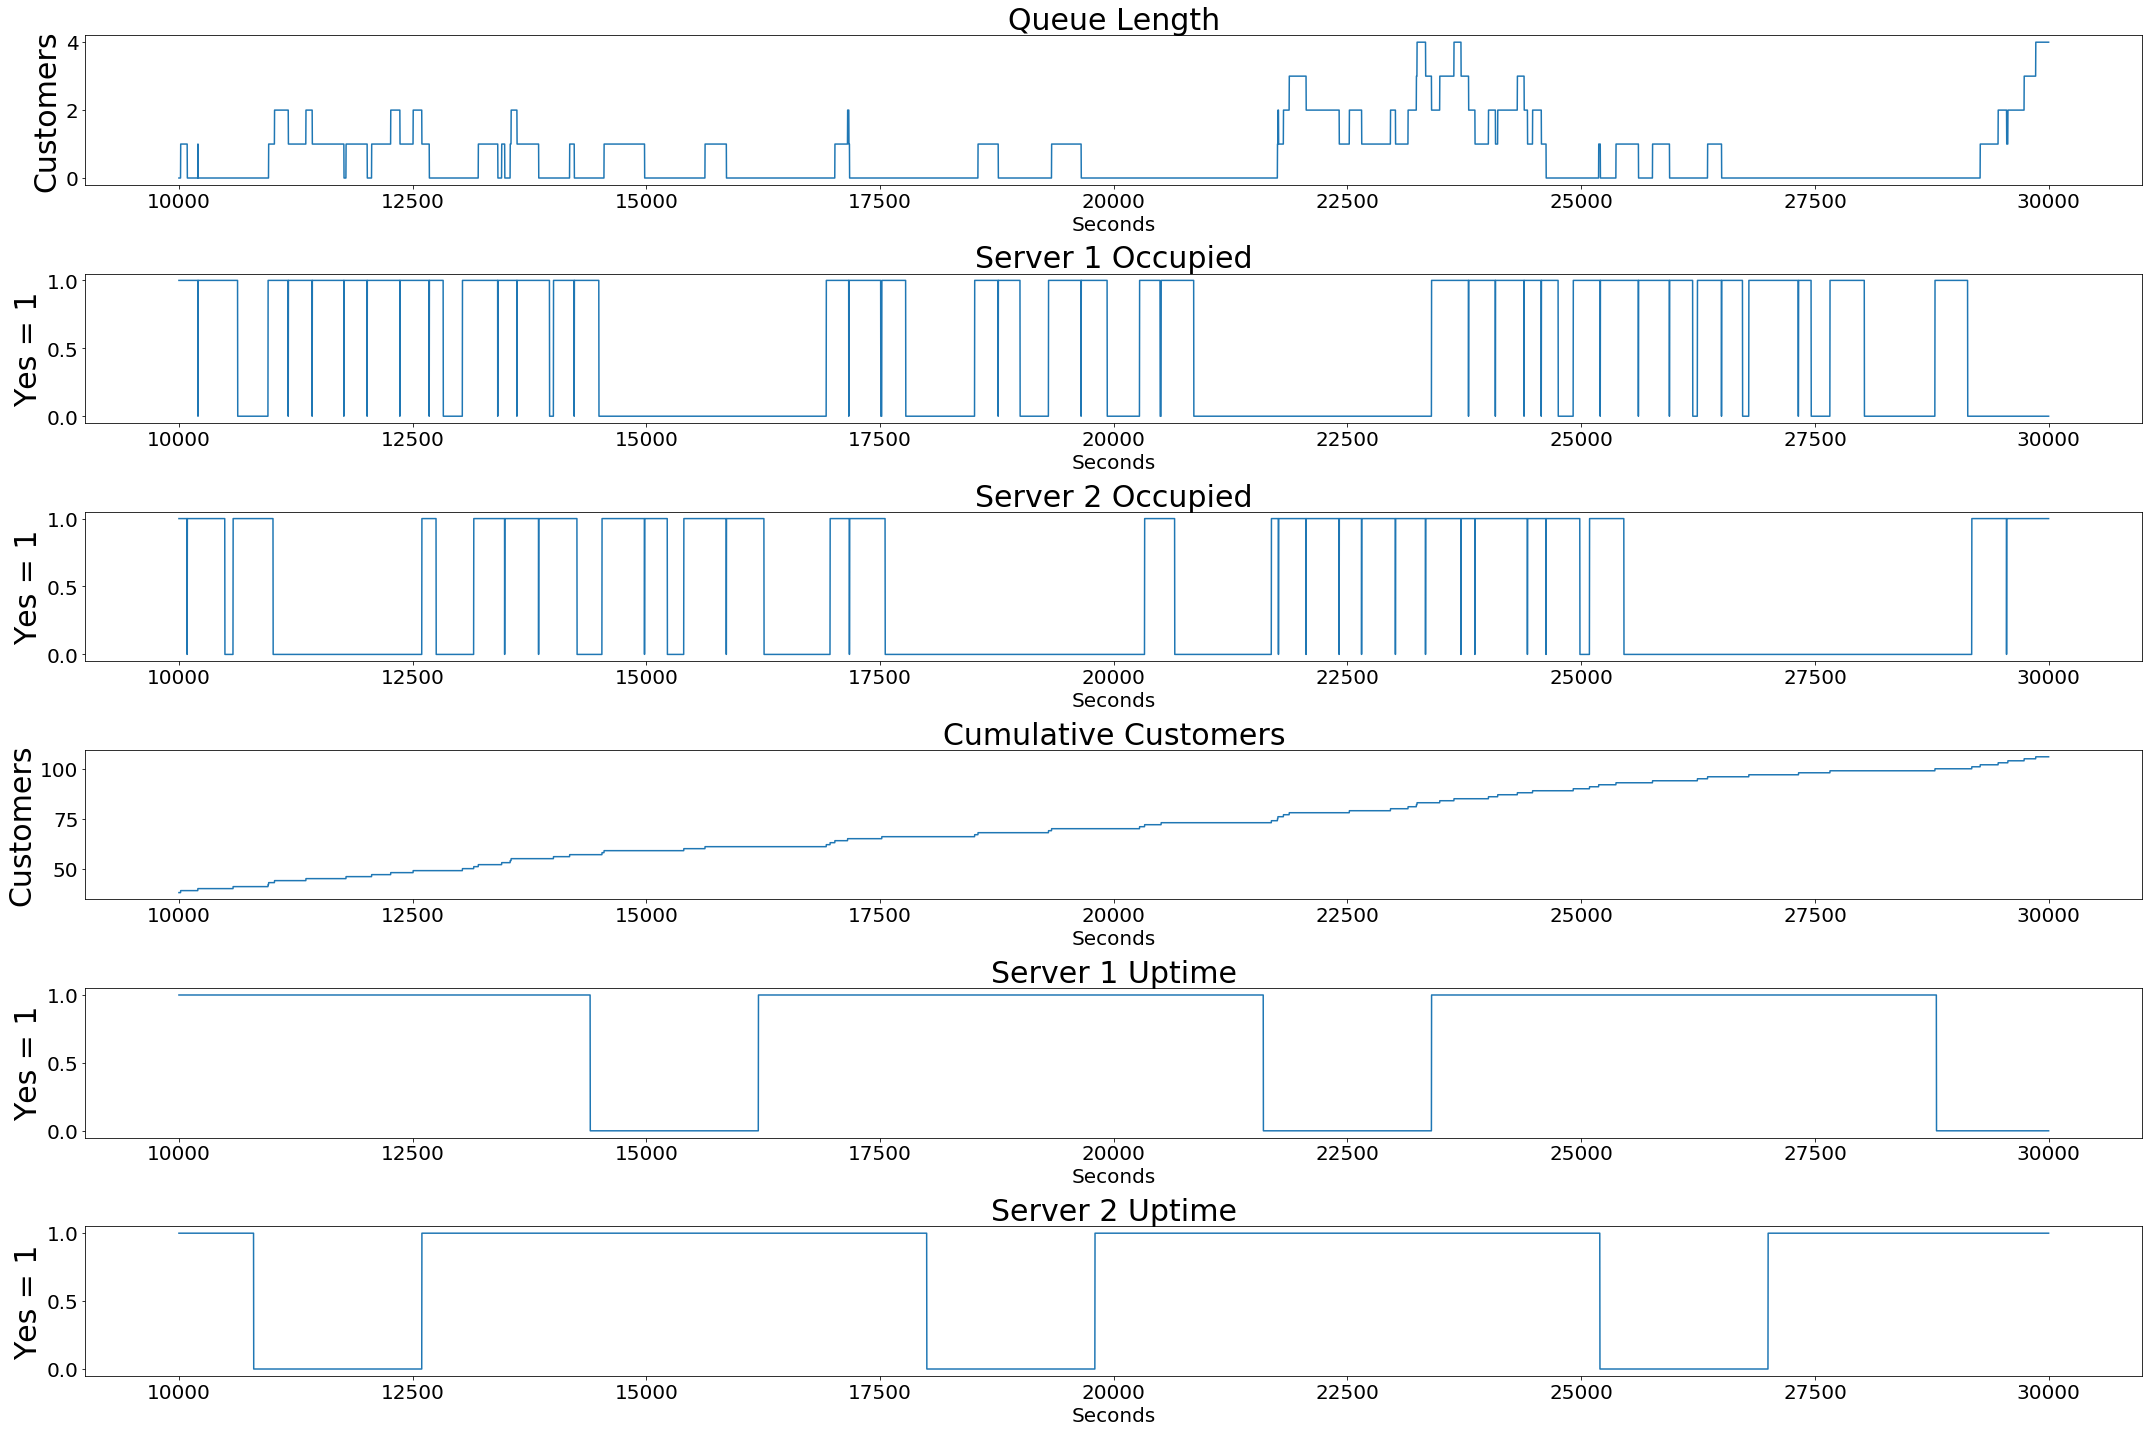

In [5]:
start_time = 10000
end_time = 30000
fig1 = plt.figure(figsize=(30, 20))
fig1_iterator = 1

for items in [[customers, 'Queue Length', 'Customers'],
              [oc1, 'Server 1 Occupied', 'Yes = 1'],
              [oc2, 'Server 2 Occupied', 'Yes = 1'],
              [cc, 'Cumulative Customers', 'Customers'],
              [d1, 'Server 1 Uptime', 'Yes = 1'],
              [dt2, 'Server 2 Uptime', 'Yes = 1']]:
    ax_val = fig1.add_subplot(6, 1, fig1_iterator)
    ax_val.plot(times[start_time:end_time], items[0][start_time:end_time])
    ax_val.set_title(items[1], fontsize=30)
    ax_val.set_xlabel('Seconds', fontsize=20)
    ax_val.set_ylabel(items[2], fontsize=30)
    ax_val.tick_params(axis='both', labelsize=20)
    fig1_iterator += 1
plt.tight_layout()

### Long-Run Simulation with Varying Arrival Times

In an exponentially distributed system, inter-arrival times should decrease proportionally with population increases.  This set of simulations explores the increase in queue length as inter-arrival time decreases.  

As inter-arrival time decreases, server utilization reaches 100% and queue length can only increase.

In [6]:
# perform a long-run simulation of parlor with parallel server
# run 11 simulations with varying mean arrivals
lambda_list = [325, 300, 250, 212, 200, 195, 190, 185, 180, 175, 170]
service_dist = [300, 100]  # mean and standard deviation of service time
total_customers_list = []
customers_list = []
dt1_list = []
dt2_list = []
oc1_list = []
oc2_list = []
cc_list = []
for i in lambda_list:
    exps = exp_generator(30000, i)
    arrivals = time_totalizer(exps)
    services = norm_generator(30000, service_dist[0], service_dist[1])
    (times, total_customers, customers,
     service_durations,
     dt1, dt2, oc1, oc2,
     cc) = parallel_plant(arrivals, services, breakdowns,
                       initial_queue, servers, duration,
                       mt, md)
    total_customers_list.append(total_customers)
    customers_list.append(customers)
    dt1_list.append(dt1)  #downtime
    dt2_list.append(dt2)
    oc1_list.append(oc1)  #occupancy
    oc2_list.append(oc2)
    cc_list.append(cc)  #cumulative customers

2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running
2 Servers Running


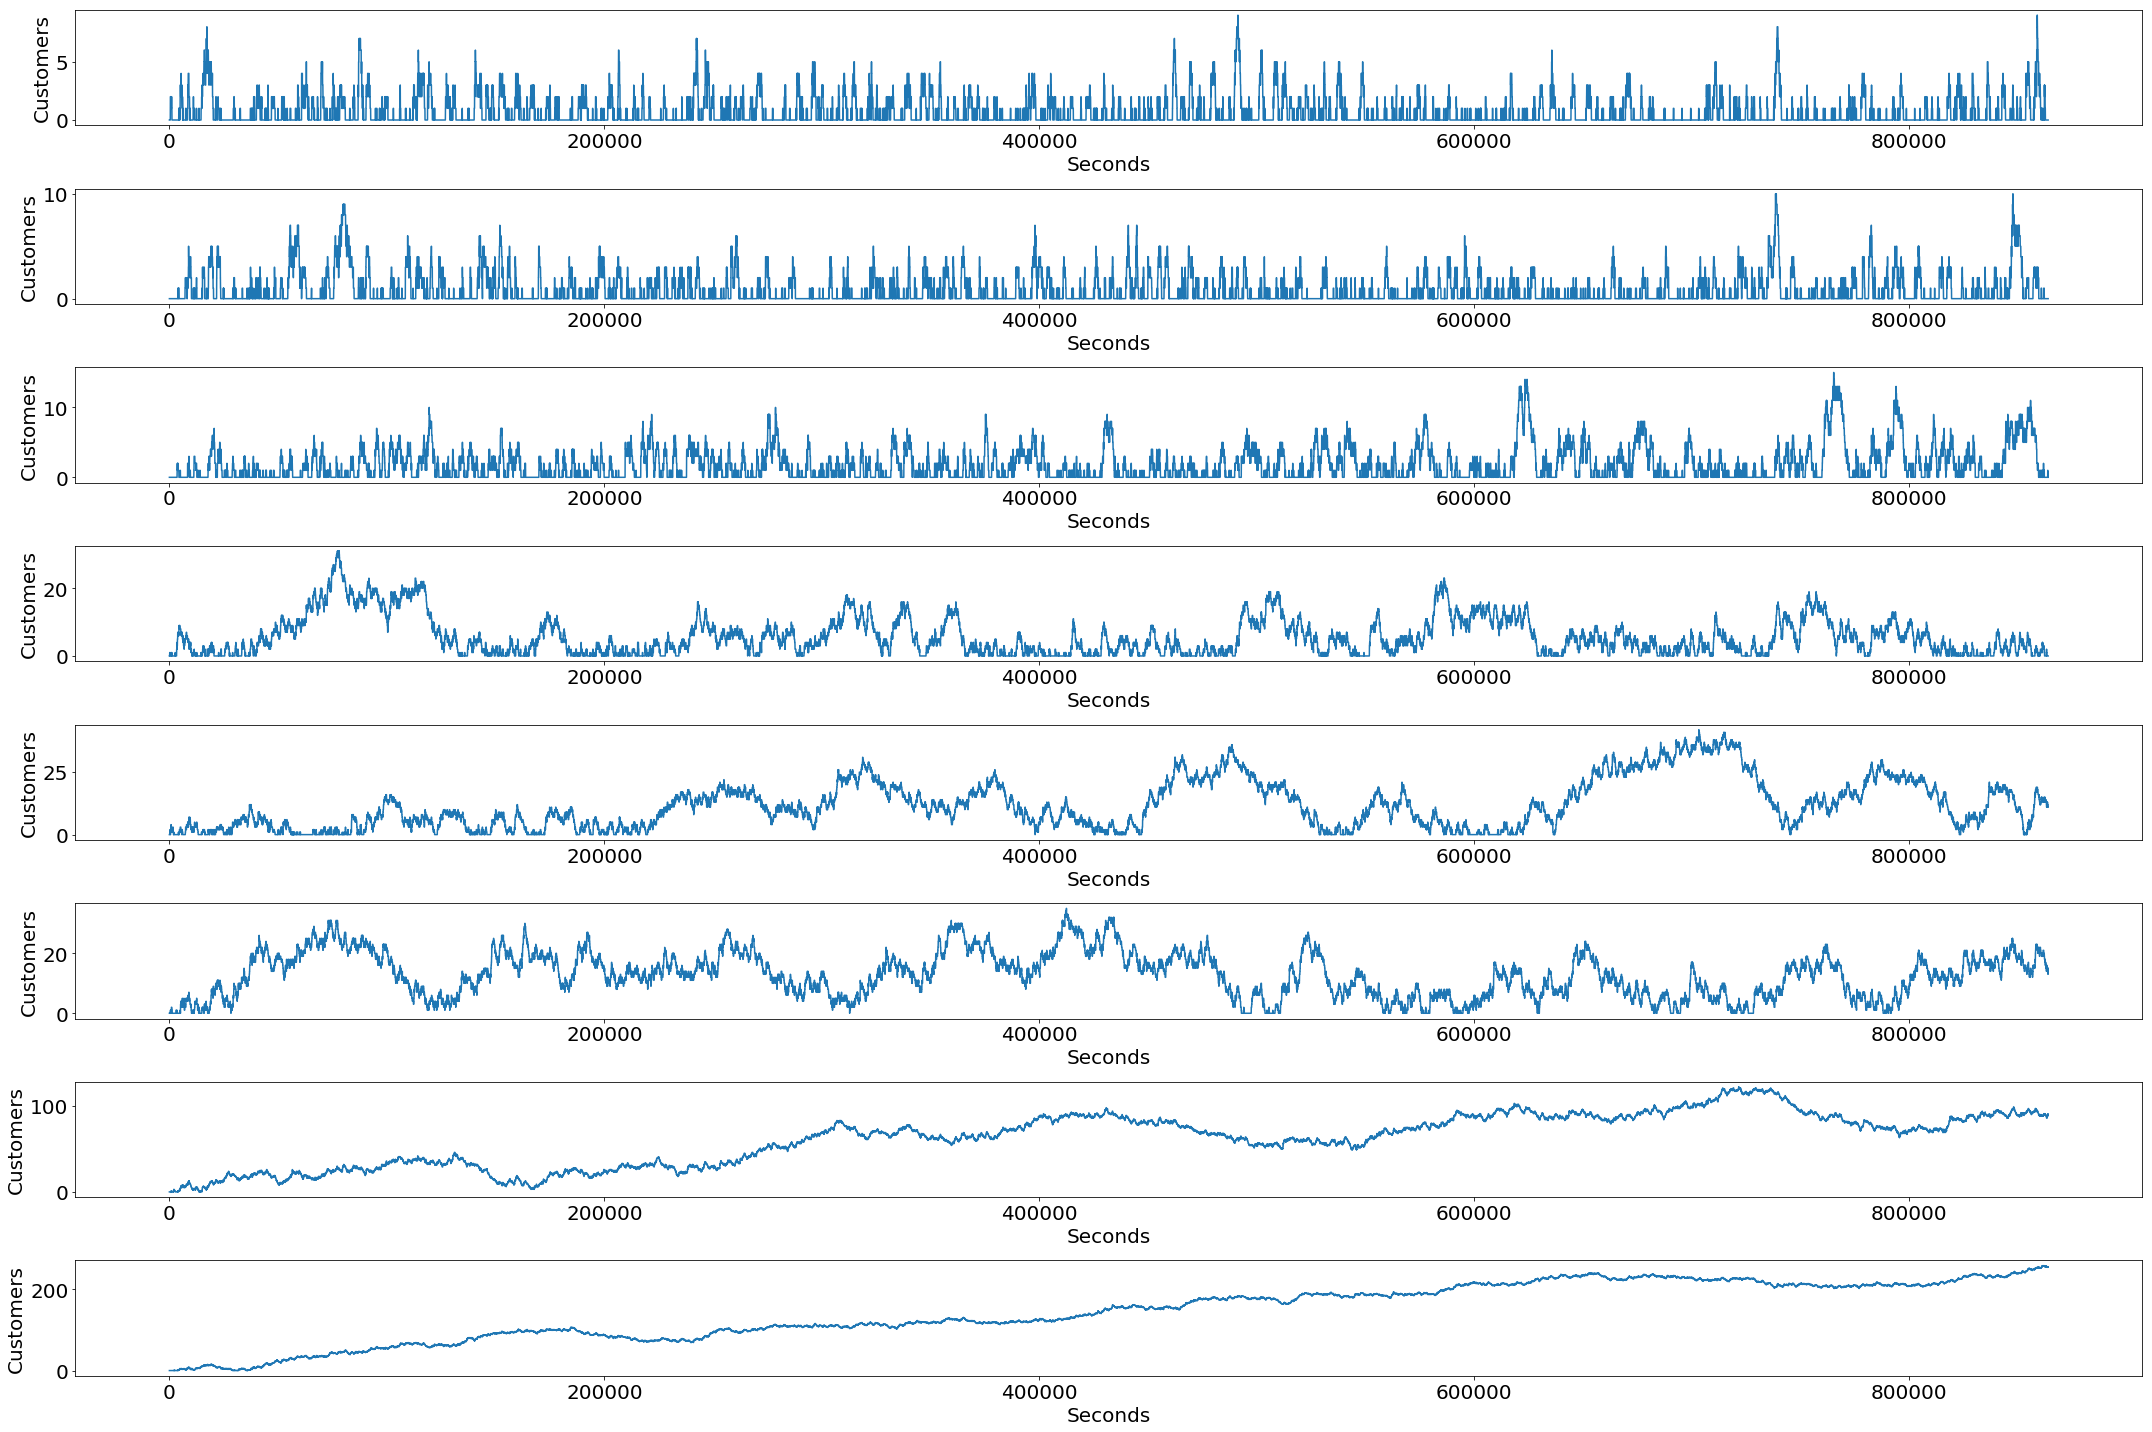

In [7]:
# plot results of varying inter-arrival times
start_time = 0
end_time = -1
fig1 = plt.figure(figsize=(30, 20))
fig1_iterator = 1

for item in customers_list[0:8]:  # this loop generates subplots for each run
    # ax_val = 'a'#'ax' + _ + item
    ax_val = fig1.add_subplot(8, 1, fig1_iterator)
    ax_val.plot(times[start_time:end_time], item[start_time:end_time])
    ax_val.set_ylabel('Customers', fontsize=20)
    ax_val.tick_params(axis='both', labelsize=20)
    ax_val.set_xlabel('Seconds', fontsize=20)
    fig1_iterator += 1
plt.tight_layout()

In [8]:
# calculate max and mean queue lengths for each run
mean_q_len = []  # mean queue length for each run
max_q_len = []  # maximum queue length for each run
for i in customers_list:
    current_mean = np.mean(i)
    current_max = np.max(i)
    mean_q_len.append(current_mean)
    max_q_len.append(current_max)
    current_samples = len(i)
    threshold_counter = 0  # counter for number of seconds above 8 in queue
    for item in i:
        if item > 8:
            threshold_counter += 1

In [9]:
# create dataframe for plotting queue length vs. arrival rate
lengths_df = pd.DataFrame(lambda_list, columns=['ii_time', ])
lengths_df['queue_length'] = mean_q_len

# convert inter-arrival times to arrival rate
lengths_df['arrival_rate'] = 1/lengths_df.ii_time

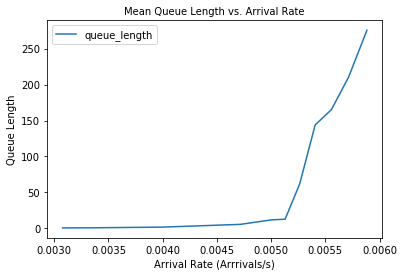

In [10]:
# plot queue length vs. arrival rate
ax = lengths_df.plot('arrival_rate', 'queue_length')
ax.set_xlabel('Arrival Rate (Arrrivals/s)', fontsize=10)
ax.set_ylabel('Queue Length', fontsize=10)
ax.set_title('Mean Queue Length vs. Arrival Rate', fontsize=10)

As inter-arrival time decreases, server utilization reaches 100%.  Upon server utilizaiton of 100%, queue length exponentially increases.